# Behavioral Lab1

This is associated with our Lecture Note 1. Also, you may find some questions are similar to the first major question in our Homework Assignment 1. 

Textbook reference:  [Chapter 4](https://www.inferentialthinking.com/chapters/04/Data_Types.html) and [Chapter 5](https://www.inferentialthinking.com/chapters/05/Sequences.html)  

#### Today's Lab

In today's exercises, you'll learn how to:

1. Sort and Select a table's rows and columns. 
2. Manipulate table by creating new variables.
3. Examine state-by-state COVID-19 case trend in the first epidemic phase.
4. Create plots and statistics to figure out how much time people stay in to avoid transmission.

Let's import the dataset named **nyt_cases_name.csv** first. This is a dataset similar to what we've seen in Lab0 before. I cut the date to 

In [183]:
from datascience import *

nytdata = Table.read_table('YData_SDS177/nyt_cases_name.csv')
nytdata

geoid,county,state,cases,deaths,date,dwell_time
1001,Autauga,AL,0,0,01jan2020,929.958
1003,Baldwin,AL,0,0,01jan2020,857.864
1005,Barbour,AL,0,0,01jan2020,788.396
1007,Bibb,AL,0,0,01jan2020,913.771
1009,Blount,AL,0,0,01jan2020,956.059
1011,Bullock,AL,0,0,01jan2020,710.707
1013,Butler,AL,0,0,01jan2020,813.134
1015,Calhoun,AL,0,0,01jan2020,837.673
1017,Chambers,AL,0,0,01jan2020,875.582
1019,Cherokee,AL,0,0,01jan2020,820.602


## 1. Sorting and Selecting Rows

How many columns do we have? What does each column mean? 

The top row shows the names of columns, or we call them "variable names". Sometimes, the imported dataset have abbreviated variable names that are hard to decipher, and we can easily change the names with `table.relabeled('old_varname','new_varname')` to make them more straightforward. 

In [147]:
nytdata.relabeled('dwell_time', 'county average home dwelling time per day in minutes')

geoid,county,state,cases,deaths,date,county average home dwelling time per day in minutes
1001,Autauga,AL,0,0,01jan2020,929.958
1003,Baldwin,AL,0,0,01jan2020,857.864
1005,Barbour,AL,0,0,01jan2020,788.396
1007,Bibb,AL,0,0,01jan2020,913.771
1009,Blount,AL,0,0,01jan2020,956.059
1011,Bullock,AL,0,0,01jan2020,710.707
1013,Butler,AL,0,0,01jan2020,813.134
1015,Calhoun,AL,0,0,01jan2020,837.673
1017,Chambers,AL,0,0,01jan2020,875.582
1019,Cherokee,AL,0,0,01jan2020,820.602


In [148]:
# Show only the first 3 rows of data
nytdata.show(3)

geoid,county,state,cases,deaths,date,dwell_time
1001,Autauga,AL,0,0,01jan2020,929.958
1003,Baldwin,AL,0,0,01jan2020,857.864
1005,Barbour,AL,0,0,01jan2020,788.396


We will see that the variable name "dwell_time" is not changed. This is because `nytdata` itself is not re-defined in our relabeling process.

**Question 1.1** What are the top 10 counties with the highest stay-at-home time? 

In [149]:
nytdata.sort('dwell_time', descending=True).show(10)

geoid,county,state,cases,deaths,date,dwell_time
30069,Petroleum,MT,0,0,26jan2020,1438
30037,Golden Valley,MT,0,0,17jan2020,1438
8053,Hinsdale,CO,3,0,18apr2020,1438
8053,Hinsdale,CO,2,0,12apr2020,1430
30037,Golden Valley,MT,0,0,28mar2020,1403
6003,Alpine,CA,1,0,05apr2020,1399.24
6003,Alpine,CA,1,0,31mar2020,1383.67
30037,Golden Valley,MT,0,0,27jan2020,1336
8053,Hinsdale,CO,1,0,04apr2020,1332
8035,Douglas,CO,298,10,12apr2020,1331.48


We use `descending=True` in `sort` because we want to find the highest rather than lowest home dwelling time. 

**Question 1.2** Based on this list of 10 rows, can you tell **TWO** possible reasons that cause a long home dwelling time on average? 

In [150]:
## Type your answer here


Sometimes we are also interested in the total number of days when a county have more than 5000 cases in a day. Those counties (and dates) require additional attention for the public to take actions (such as working from home or wearing a mask to go outside). 

To find those county-date combinations, we need `table.where('variable', are...)`. 

In [151]:
nytdata.where('cases',are.above(5000))

geoid,county,state,cases,deaths,date,dwell_time
4013,Maricopa,AZ,5138,186,06may2020,857.301
4013,Maricopa,AZ,5196,204,07may2020,839.712
4013,Maricopa,AZ,5525,238,08may2020,819.933
4013,Maricopa,AZ,5779,245,09may2020,849.018
4013,Maricopa,AZ,5827,247,10may2020,910.007
4013,Maricopa,AZ,5988,250,11may2020,847.053
4013,Maricopa,AZ,6219,259,12may2020,839.424
4013,Maricopa,AZ,6341,281,13may2020,822.393
4013,Maricopa,AZ,6599,292,14may2020,832.017
4013,Maricopa,AZ,6821,302,15may2020,781.498


**Question 1.3** How many county-date combinations have cases above 5000? What is the highest home dwelling time among those combinations? 

In [152]:
nytdata.where('cases',are.above(5000)).sort('dwell_time',descending=True)

geoid,county,state,cases,deaths,date,dwell_time
36059,Nassau,NY,23553,1030,12apr2020,1266.33
36059,Nassau,NY,34522,1962,26apr2020,1257.24
36059,Nassau,NY,24358,1109,13apr2020,1257.21
34003,Bergen,NJ,9784,453,12apr2020,1253.32
34003,Bergen,NJ,14965,955,26apr2020,1252.56
34025,Monmouth,NJ,5671,291,26apr2020,1243.83
36059,Nassau,NY,6445,39,29mar2020,1243.51
36059,Nassau,NY,5537,35,28mar2020,1234.78
36059,Nassau,NY,29180,1356,18apr2020,1224.78
34003,Bergen,NJ,10092,482,13apr2020,1224.21


Note that after the `where` function, what we get was still a table, which can be added with new `table.function`s.

We can also examine data in a selected county.

**Question 1.4** When does New Haven had the highest average home dwelling time in the dataset? And What was the highest cases in New Haven? (use `equal_to`)

In [153]:
# Type your answer here


## 2. Creating new variables based on the existing variables

Sometimes we need certain transformation of data before using it. For instance, we have seen cases were increasing in an exponential way in the first phase, yet we may think that people choose to increase the time at home in a linear way. Before we figure out the way to express the possible correlation, let us create a new variable that equals to ln(cases).

Actually, given the fact that ln(0) is undefined and our case column contains lots of zeros, we define a new variable that equals to ln(cases + 1).

In [154]:
import numpy as np
nyt_cases = nytdata.with_columns(
        'log transformation of cases', np.log(nytdata.column('cases')+1)
)
import pandas as pd 
nyt_cases.sort('log transformation of cases', descending=True)

geoid,county,state,cases,deaths,date,dwell_time,log transformation of cases
36061,New York,NY,204111,20795,26may2020,590.555,12.2264
36061,New York,NY,203569,20740,25may2020,604.917,12.2238
36061,New York,NY,202931,20697,24may2020,596.714,12.2206
36061,New York,NY,202062,20621,23may2020,647.159,12.2163
36061,New York,NY,201298,20569,22may2020,643.844,12.2125
36061,New York,NY,200507,20491,21may2020,689.287,12.2086
36061,New York,NY,199392,20422,20may2020,726.176,12.203
36061,New York,NY,198710,20376,19may2020,738.072,12.1996
36061,New York,NY,198114,20298,18may2020,723.077,12.1966
36061,New York,NY,197486,20214,17may2020,739.853,12.1934


**Question 2.1** Define a variable named "death rate" that equals to deaths devided by cases plus deaths (which can be roughly considered as the total infected group). You may get a warning in red, which is because we were trying to devide 0 by 0. And you should get "nan" for those undefined values. 

In which county (and when) do we find a highest death rate during the study period? 

In [155]:
infected = nytdata.column('cases') + nytdata.column('deaths')

nyt_rate = nytdata.with_columns('death rate', np.nan_to_num(nytdata.column('deaths')/infected))
nyt_rate

<ipython-input-155-d32603266a2d>:3: RuntimeWarning: invalid value encountered in true_divide
  nyt_rate = nytdata.with_columns('death rate', np.nan_to_num(nytdata.column('deaths')/infected))


geoid,county,state,cases,deaths,date,dwell_time,death rate
1001,Autauga,AL,0,0,01jan2020,929.958,0
1003,Baldwin,AL,0,0,01jan2020,857.864,0
1005,Barbour,AL,0,0,01jan2020,788.396,0
1007,Bibb,AL,0,0,01jan2020,913.771,0
1009,Blount,AL,0,0,01jan2020,956.059,0
1011,Bullock,AL,0,0,01jan2020,710.707,0
1013,Butler,AL,0,0,01jan2020,813.134,0
1015,Calhoun,AL,0,0,01jan2020,837.673,0
1017,Chambers,AL,0,0,01jan2020,875.582,0
1019,Cherokee,AL,0,0,01jan2020,820.602,0


In [156]:
nyt_rate.sort('death rate', descending = True)

geoid,county,state,cases,deaths,date,dwell_time,death rate
55135,Waupaca,WI,1,1,31mar2020,693.532,0.5
55135,Waupaca,WI,1,1,30mar2020,668.394,0.5
55135,Waupaca,WI,1,1,29mar2020,844.748,0.5
55135,Waupaca,WI,1,1,28mar2020,811.573,0.5
55051,Iron,WI,1,1,10apr2020,757.1,0.5
55051,Iron,WI,1,1,09apr2020,834.831,0.5
55051,Iron,WI,1,1,08apr2020,792.288,0.5
55051,Iron,WI,1,1,07apr2020,846.104,0.5
55051,Iron,WI,1,1,06apr2020,890.014,0.5
55051,Iron,WI,1,1,05apr2020,992.331,0.5


We can also convert the rate into a percentage value.

### 2.1 Set Format for a Column

Sometimes, we need to make the format of a variable into a more direct way to read.

In [157]:
nyt_rate.set_format('death rate', PercentFormatter)

geoid,county,state,cases,deaths,date,dwell_time,death rate
1001,Autauga,AL,0,0,01jan2020,929.958,0.00%
1003,Baldwin,AL,0,0,01jan2020,857.864,0.00%
1005,Barbour,AL,0,0,01jan2020,788.396,0.00%
1007,Bibb,AL,0,0,01jan2020,913.771,0.00%
1009,Blount,AL,0,0,01jan2020,956.059,0.00%
1011,Bullock,AL,0,0,01jan2020,710.707,0.00%
1013,Butler,AL,0,0,01jan2020,813.134,0.00%
1015,Calhoun,AL,0,0,01jan2020,837.673,0.00%
1017,Chambers,AL,0,0,01jan2020,875.582,0.00%
1019,Cherokee,AL,0,0,01jan2020,820.602,0.00%


However, this is a really slappy way to calculate the "death rate" of a disease, especially when the case and death numbers are too small. We will learn some better ways to do estimation in the future.

In [158]:
nytdata.sort('date',descending = True)

geoid,county,state,cases,deaths,date,dwell_time
56045,Weston,WY,0,0,31mar2020,330.44
56043,Washakie,WY,1,0,31mar2020,401.884
56041,Uinta,WY,0,0,31mar2020,569.315
56039,Teton,WY,23,0,31mar2020,416.503
56037,Sweetwater,WY,2,0,31mar2020,564.569
56035,Sublette,WY,1,0,31mar2020,650.313
56033,Sheridan,WY,10,0,31mar2020,623.973
56031,Platte,WY,0,0,31mar2020,312.682
56029,Park,WY,1,0,31mar2020,516.119
56027,Niobrara,WY,0,0,31mar2020,371.985


**Question 2.1.1** What is the problem of sorting for dates here?

Another more useful example is to convert the string under `date` into a real date value. (What is the difference here? Python currently do not understand 01jan2020 is a date prior to 01apr2020, it only can tell "a" is in front of "j", and would rather rank 01apr2020 in front of 01jan2020.

To do so, we need to examine how the date values are presented in this specific dataset. It appears to have 2 digits of the day in front of month (but not number! Its the abbreviation of the month name), then in front of the 4 digits of the year.

In [184]:
nytdata.set_format('date', DateFormatter('%d%b%Y'))
nytdata

geoid,county,state,cases,deaths,date,dwell_time
1001,Autauga,AL,0,0,01Jan2020,929.958
1003,Baldwin,AL,0,0,01Jan2020,857.864
1005,Barbour,AL,0,0,01Jan2020,788.396
1007,Bibb,AL,0,0,01Jan2020,913.771
1009,Blount,AL,0,0,01Jan2020,956.059
1011,Bullock,AL,0,0,01Jan2020,710.707
1013,Butler,AL,0,0,01Jan2020,813.134
1015,Calhoun,AL,0,0,01Jan2020,837.673
1017,Chambers,AL,0,0,01Jan2020,875.582
1019,Cherokee,AL,0,0,01Jan2020,820.602


In [165]:
# This time, when we sort date in a reverse way, we will see 26May2020 at first. 
nytdata.sort('date',descending = True)

geoid,county,state,cases,deaths,date,dwell_time
56045,Weston,WY,0,0,26May2020,322.289
56043,Washakie,WY,32,2,26May2020,570.982
56041,Uinta,WY,12,0,26May2020,585.409
56039,Teton,WY,100,1,26May2020,386.272
56037,Sweetwater,WY,25,0,26May2020,528.703
56035,Sublette,WY,3,0,26May2020,604.527
56033,Sheridan,WY,16,0,26May2020,614.828
56031,Platte,WY,1,0,26May2020,288.553
56029,Park,WY,2,0,26May2020,476.497
56027,Niobrara,WY,2,0,26May2020,332.366


## 3. Examine state-by-state COVID-19 case trend in the first epidemic phase

Although the case and death reports for each county and each day show us the details, we sometimes want to see a summary of reports to quickly identify, say, which state(s) have a high case reports, which date period were the epidemic reached to the peak, etc. To do so, we would love to use a method to sum data by `group`.

In [166]:
# find the state mean
state_group = nytdata.group('state', np.mean)
state_group

state,geoid mean,county mean,cases mean,deaths mean,date mean,dwell_time mean
AL,1067,,42.4839,1.57295,1.58416e+09,701.909
AR,5075,,15.199,0.320272,1.58416e+09,664.021
AZ,4013.87,,208.6,9.23537,1.58416e+09,572.695
CA,6058,,335.603,12.9089,1.58416e+09,718.563
CO,8062.23,,85.9373,4.30251,1.58416e+09,551.878
CT,9008,,1171.04,94.8656,1.58416e+09,688.028
DC,11001,,1673.64,79.6054,1.58416e+09,519.904
DE,10003,,569.034,19.1973,1.58416e+09,659.63
FL,12067.9,,185.725,6.86506,1.58416e+09,638.372
GA,13161.5,,56.114,2.47166,1.58416e+09,683.399


Because county are hard to get an average, they were left blank in the above table. Now, it is easier to see that during the study period, Connecticut has an average cases around 1171, and the average death around 95.

**Question 3.1** What is going on with the date mean?

**Question 3.2** Which state has the highest average case reports during the study period? What is the average home dwelling time for that state?

In [74]:
## Type your answer here


**Question 3.3** We can also see the trend by date, how would you do it with the group function? What can you find from the new table that you generate?


In [167]:
## Type your answer here
date_group = nytdata.group('date', np.mean)
date_group

date,geoid mean,county mean,state mean,cases mean,deaths mean,dwell_time mean
1.57785e+09,30644.8,,,0,0,750.763
1.57794e+09,30644.8,,,0,0,670.982
1.57803e+09,30644.8,,,0,0,637.446
1.57811e+09,30644.8,,,0,0,724.092
1.5782e+09,30644.8,,,0,0,802.027
1.57829e+09,30644.8,,,0,0,645.047
1.57837e+09,30644.8,,,0,0,633.412
1.57846e+09,30644.8,,,0,0,636.729
1.57855e+09,30644.8,,,0,0,620.439
1.57863e+09,30644.8,,,0,0,595.923


**Question 3.3** what is going on with the date values again?

**Question 3.4** We can also use the `group` function to find the group maximum or minimum. Find the top 10 state(s) that contains the county with the highest home dwelling time using `group`. Can you use a function to add a new column for the average state home-dwelling time?

## 4. Create plots and statistics

### 4.1. Line plot

In [124]:
# this code makes it so that figures appear in Jupyter notebooks, do not remove it!
%matplotlib inline
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates 

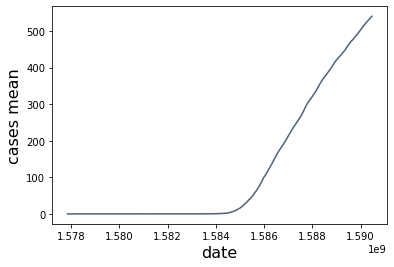

In [170]:
date_group.plot('date','cases mean')

Note that date on the horizontal axis is weird, we will find a better way to define the format later.

### 4.2. Scatter plot

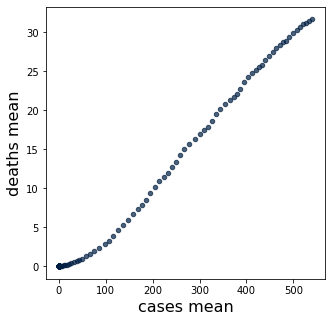

In [180]:
date_group.scatter('cases mean','deaths mean')

**Question 4.2.1** It appears that there is a linear relationship between the case number reported and the death number reported. Can we make a rush conclusion about the death rate? What other factors may have an impact as well?

In [181]:
# Type your answer here


### 4.3. Bar plot

Note that we use a horizontal bar plot, or `barh` here to better present the average dwell time at home in each state. 

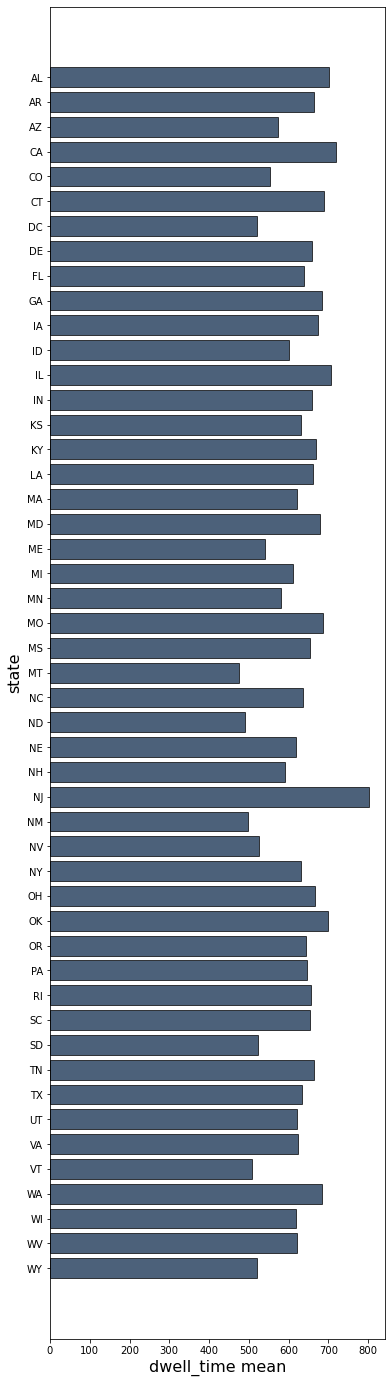

In [178]:
state_group.barh('state','dwell_time mean')

**Question 4.3.1** Try to re-plot the above figure with a descending dwell time (so the states with the maximum average dwelling time appears above). Reference of the textbook is [here](https://www.inferentialthinking.com/chapters/07/1/Visualizing_Categorical_Distributions.html).

In [182]:
# Type your answer here


### 4.4 Histograms

Our final practice of plot is about histograms. Histograms are a convenient way to view the full shape of a distribution. We can create a histogram from a table using the syntax: table.hist('col_name') where 'col_name' refers to the column whose values we want to use to make the histogram.

**Question 4.4.1** Use the nytdata to show a distribution of home dwell time in minutes using `hist`. What do you observe from the plot?

In [ ]:
# Type your answer here

